# Assignment 4:
### รหัสนักศึกษา: 65130701717
### ชื่อ-นามสกุล: RATTAWIT PATTARACHAROENPONG
### หลักสูตร: SED

# KMeans Clustering

## KMeans - Example in class 

In [105]:
import pandas as pd

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [15, 14, 19, 12, 11, 20, 15, 17, 16, 16]
store = ['A','B','C','D','E','F','G','H','I','J']

df = pd.DataFrame() 
df['Store'] = store
df['Apples'] = x
df['Oranges'] = y
data = df[['Apples','Oranges']]

1. จัดกลุ่ม data โดยใช้วิธี k-means โดยกำหนดจำนวนกลุ่มเป็น 2 กลุ่ม 

In [106]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
model.fit(data)

KMeans(n_clusters=2)

2. สร้าง labels ของ data ว่าอยู่กลุ่มใด โดยใช้ .predict()

In [107]:
labels = model.predict(data)
print(labels)

[1 1 0 1 1 0 0 1 0 0]


3. หาค่า centroids จากค่า cluster_centers_ ที่ได้จาก model

In [108]:
centroids = model.cluster_centers_
print(centroids)

[[11.4 17.2]
 [ 4.4 13.8]]


4. Plot แบบ scatter โดยแกน x เป็นค่าจาก data คอลัมน์ 'Apples' และ แกน y เป็นค่าจากคอลัมน์ 'Oranges' แสดงค่าสีด้วย labels ของ data ที่ได้จากการจัดกลุ่ม

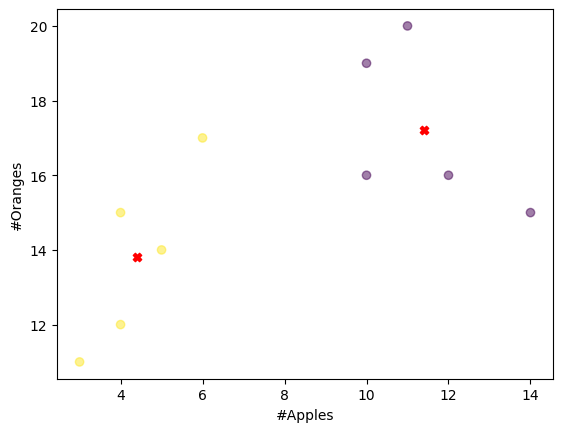

In [109]:
import matplotlib.pyplot as plt

plt.scatter(df['Apples'],df['Oranges'], c=labels,alpha=0.5)
plt.scatter(centroids[:,0],centroids[:,1],marker='X', c='r')
plt.xlabel('#Apples')
plt.ylabel('#Oranges')
plt.show()

## KMeans - 2D


1. อ่านข้อมูลจาก data2Dset1.csv

In [73]:
import pandas as pd

data = pd.read_csv('data2Dset1.csv', header=None)
data.head()


,0,1
0,-4.575007,-6.364897
1,-7.202692,4.560245
2,-7.148368,-1.115191
3,-7.915773,-0.757674
4,-7.118251,-2.965019


2. เก็บค่าของ data ในตัวแปร points ซึ่งเป็น numpy array

In [74]:
points = data.values
print(points.shape)
# points

(100, 2)


3. Plot แบบ scatter แสดง points 

Text(0, 0.5, '$x_2$')

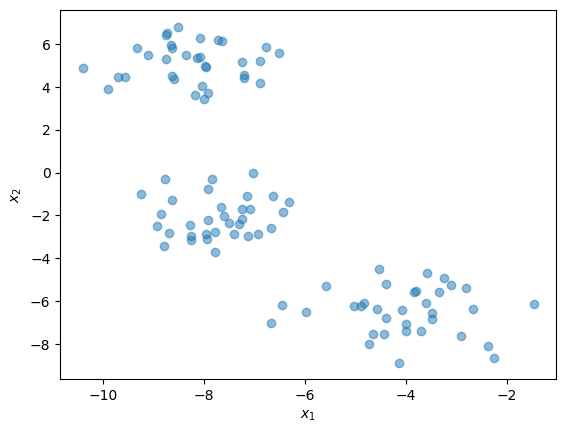

In [75]:
import matplotlib.pyplot as plt
plt.scatter(points[:,0], points[:,1], alpha = 0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

4. จัดกลุ่ม points โดยวิธี KMeans กำหนด n_clusters = 3 โดยเก็บไว้ที่ตัวแปร model

In [76]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(points)

KMeans(n_clusters=3)

5. สร้าง labels ของ points ว่าอยู่กลุ่มใด โดยใช้ .predict()

In [77]:
labels = model.predict(points)
print(labels)


[1 0 2 2 2 1 1 2 1 1 0 2 2 1 0 2 0 1 1 1 2 2 1 2 2 0 2 0 1 0 2 1 2 1 0 1 1
 2 0 2 2 0 1 2 2 2 1 0 2 0 1 0 2 0 0 1 0 0 2 0 1 2 1 0 0 0 1 2 2 1 1 1 2 0
 2 0 1 1 0 2 0 0 1 1 0 1 0 1 2 0 0 0 2 1 0 1 0 2 2 1]


6. หาค่า centroids จากค่า cluster_centers_ ที่ได้จาก model

In [78]:
centroids = model.cluster_centers_
print(centroids)

[[-8.24132694  5.12663729]
 [-4.0259642  -6.46730659]
 [-7.72806305 -2.06698658]]


7. Plot จุด โดยมีการกำหนดสีกลุ่มตาม labels 

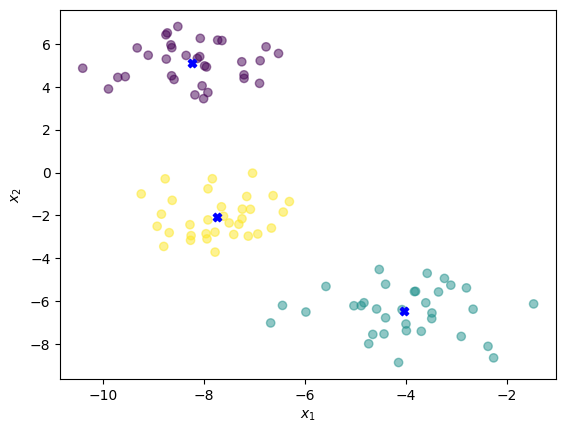

In [79]:
import matplotlib.pyplot as plt

plt.scatter(points[:,0], points[:,1], c=labels,alpha=0.5)
plt.scatter(centroids[:,0],centroids[:,1],marker='X', c='b')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

8. แสดงค่า Inertia measure จากค่า .inertia_ ของ model ที่ได้ 

In [80]:
print(model.inertia_)

185.24386730181635


9. ทดสอบ สร้างโมเดลจัดกลุ่มข้อมูลในตัวแปร points โดยใช้ KMeans เมื่อ k=1,2,...,10 และ Plot แสดงค่า inertia ของแต่ละ k

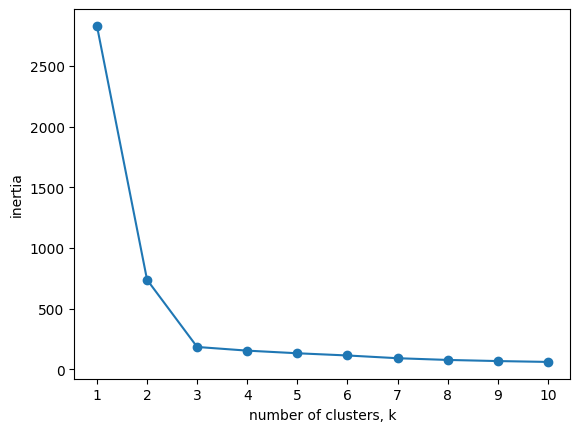

In [81]:
ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(points)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

10. จากกราฟในข้อ 9 จะได้ว่า ค่า k ที่เหมาะสมคือ = 3 คับ

k ที่เหมาะสมคือ = 3 คับ

## KMeans the wines dataset

1. อ่านข้อมูลจาก wine.csv เก็บไว้ที่ตัวแปร data

In [110]:
import pandas as pd
data = pd.read_csv('wine.csv')
data.head(3)

,varieties,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


2. กำหนด X เป็น numpy array ข้อมูลจาก data ยกเว้นคอลัมน์ 'varieties' 

In [111]:
X = data.drop('varieties',axis=1).values
print(X[:3,:])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]]


3. Plot X แบบ scatter ข้อมูล X ในคอลัมน์ 0 และ คอลัมน์ 4 และกำหนด axis ของกราฟเป็น 'equal'

Text(0, 0.5, 'magnesium')

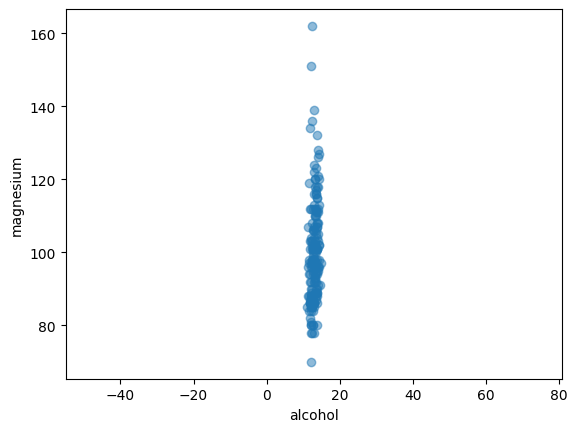

In [112]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,4],alpha=0.5)
plt.axis('equal')
plt.xlabel('alcohol')
plt.ylabel('magnesium')

4. จัดกลุ่ม X โดยวิธี KMeans กำหนด n_clusters = 3 โดยเก็บไว้ที่ตัวแปร model

In [113]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(X)

KMeans(n_clusters=3)

5. สร้าง labels ระบุกลุ่มของข้อมูล X โดยใช้ model ที่ได้

In [114]:
labels = model.predict(X)
print(labels)

[1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1 1 1 1 1 1 2 2
 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 0 2 0 0 2 2 2 0 0 1
 2 0 0 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 2 2 0 2 0 2 0 0 0 2 0 0 0 0 2 0
 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2 0 0 0 2 2 0 0 2 2 0 2
 2 0 0 0 0 2 2 2 0 2 2 2 0 2 0 2 2 0 2 2 2 2 0 0 2 2 2 2 2 0]


6. ทำ crosstab ระหว่าง labels และ varieties

In [115]:
df = pd.DataFrame({'labels': labels})
df['varieties'] = data['varieties']

In [116]:
ct = pd.crosstab(df['labels'], df['varieties']) 
print(ct)

varieties  Barbera  Barolo  Grignolino
labels                                
0               19       0          50
1                0      46           1
2               29      13          20


## KMeans with Scaling and Pipeline

1. อ่านข้อมูลจาก wine.csv เก็บไว้ที่ตัวแปร data

In [89]:
import pandas as pd
data = pd.read_csv('wine.csv')
data.head(3)

,varieties,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


2. กำหนด X เป็น numpy array ข้อมูลจาก data ยกเว้นคอลัมน์ 'varieties'

In [90]:
X = data.drop('varieties',axis=1).values
print(X[:3,:])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]]


3. สร้าง StandardScaler เก็บไว้ที่ตัวแปร scaler

In [91]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline 

scaler = StandardScaler()


4. สร้าง ตัวแบบจัดกลุ่ม KMeans เก็บไว้ที่ตัวแปร kmeans  โดยกำหนด n_clusters = 3

In [92]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

5. สร้าง pipeline โดยใช้ make_pipeline จาก sklearn.pipeline โดยเริ่มจาก scaler แล้วตามด้วย kmeans

In [93]:
from sklearn.pipeline import make_pipeline 
pipeline = make_pipeline(scaler, kmeans)

6. ทำการสร้างโมเดลจาก pipline ที่สร้างขึ้น โดยใช้ .fit() กับข้อมูล X

In [94]:
pipeline.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

7. สร้าง labels ให้กับข้อมูล X โดยใช้ .predict() กับ pipline ที่สร้างไว้  

In [95]:
labels = pipeline.predict(X)
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 2 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


8. ทำ crosstab ระหว่าง labels และ varieties 

In [96]:
df = pd.DataFrame({'labels': labels})
df['varieties'] = data['varieties']

In [97]:
ct = pd.crosstab(df['labels'], df['varieties'])
print(ct)

varieties  Barbera  Barolo  Grignolino
labels                                
0               48       0           3
1                0       0          65
2                0      59           3


9. (optional) Plot แสดงค่า X คอลัมน์ 0 และ 4 ที่ได้ scale แล้ว 

In [98]:
Xsc = scaler.transform(X)
# Xsc

Text(0, 0.5, 'magnesium')

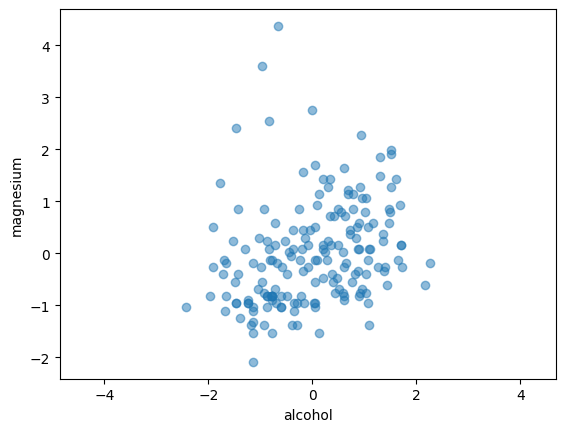

In [99]:
import matplotlib.pyplot as plt
plt.scatter(Xsc[:,0],Xsc[:,4],alpha=0.5)
plt.axis('equal')
plt.xlabel('alcohol')
plt.ylabel('magnesium')

## KMeans : Stock data

1. อ่านข้อมูลจาก company-stock-movements-2010-2015-incl.csv เก็บไว้ที่ตัวแปร data

In [139]:
import pandas as pd
data = pd.read_csv('company-stock-movements-2010-2015-incl.csv')
data.head(3)

,companies,1/4/2010,1/5/2010,1/6/2010,1/7/2010,1/8/2010,1/11/2010,1/12/2010,1/13/2010,1/14/2010,...,10/16/2013,10/17/2013,10/18/2013,10/21/2013,10/22/2013,10/23/2013,10/24/2013,10/25/2013,10/28/2013,10/29/2013
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021


2. กำหนด X เป็น numpy array ข้อมูลจาก data ยกเว้นคอลัมน์ 'companies'

In [140]:
X = data.drop('companies',axis=1).values
print(X[:3,:])

[[  0.58      -0.220005  -3.409998 ...  -5.359962   0.840019 -19.589981]
 [ -0.640002  -0.65      -0.210001 ...  -0.040001  -0.400002   0.66    ]
 [ -2.350006   1.260009  -2.350006 ...   4.790009  -1.760009   3.740021]]


3. ทำข้อมูลให้อยู่ในรูปมาตรฐาน ด้วย Normalizer ให้ชื่อว่า normalizer
4. สร้างตัวแบบโมเดล kmeans ด้วย KMeans กำหนด จำนวนกลุ่ม (k) มีค่า 10
5. สร้าง pipeline โดยใช้ make_pipeline จาก sklearn.pipeline โดยเริ่มจาก normalizer แล้วตามด้วย kmeans
6. ทำการสร้างโมเดลจาก pipline ที่สร้างขึ้น โดยใช้ .fit() กับข้อมูล X

In [141]:
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline 

normalizer = Normalizer().fit(X)
normalizer.transform(X)
kmeans = KMeans(n_clusters=3)
pipeline = make_pipeline(normalizer, kmeans)
pipeline.fit(X)

Pipeline(steps=[('normalizer', Normalizer()), ('kmeans', KMeans(n_clusters=3))])

7. สร้าง labels ให้กับข้อมูล X โดยใช้ .predict() กับ pipline ที่สร้างไว้

In [142]:
labels = pipeline.predict(X)
print(labels)

[0 2 0 2 2 2 2 2 0 1 2 0 2 2 0 2 2 0 2 2 2 2 0 0 0 1 2 1 1 2 2 2 2 0 2 0 2
 2 1 1 1 1 2 0 0 2 2 0 2 2 0 0 2 2 1 2 1 2 0 0]


8. แสดง companies ตามลำดับกลุ่ม จะทำให้เห็นว่า companies ใด มีทิศทางในทางเดียวกัน 

In [143]:
df = pd.DataFrame()
df['labels'] = labels
df['companies'] = data['companies']
df.sort_values('labels')

,labels,companies
0,0,Apple
51,0,Texas instruments
50,0,Taiwan Semiconductor Manufacturing
47,0,Symantec
44,0,Schlumberger
43,0,SAP
35,0,Navistar
33,0,Microsoft
58,0,Xerox
24,0,Intel


# Hierarchical Clustering

## Hierarchical Clustering Example

In [154]:
import pandas as pd

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [15, 14, 19, 12, 11, 20, 15, 17, 16, 16]
store = ['A','B','C','D','E','F','G','H','I','J']

df = pd.DataFrame() 
df['Store'] = store
df['Apples'] = x
df['Oranges'] = y
data = df[['Apples','Oranges']].values


1. สร้าง hi_linkage โดยใช้ linkage กำหนด method เป็น 'single' และ metric เป็น 'euclidean'
2. Plot dendrogram โดยกำหนดให้ label เป็น store

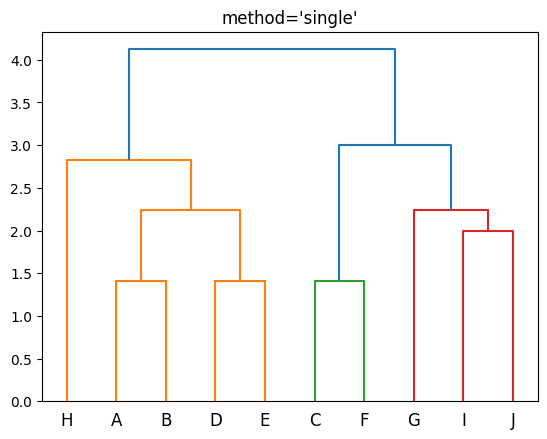

In [155]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

hi_linkage = linkage(data, method='single', metric='euclidean')

dendrogram(hi_linkage,labels=store)

plt.title("method='single'")
plt.show()

3. สร้าง cluster บน hi_linkage  โดยใช้ fcluster เก็บไว้ที่ตัวแปร labels กำหนดค่า t=3.5 และ criterion='distance'

In [156]:
from scipy.cluster.hierarchy import fcluster
labels = fcluster(hi_linkage, t=3.5, criterion='distance')
print(labels)

[1 1 2 1 1 2 2 1 2 2]


4. Plot แบบ scatter โดยแกน x เป็นค่าจาก data คอลัมน์ 'Apples' และ แกน y เป็นค่าจากคอลัมน์ 'Oranges' แสดงค่าสีด้วย labels ของ data ที่ได้จากการจัดกลุ่ม

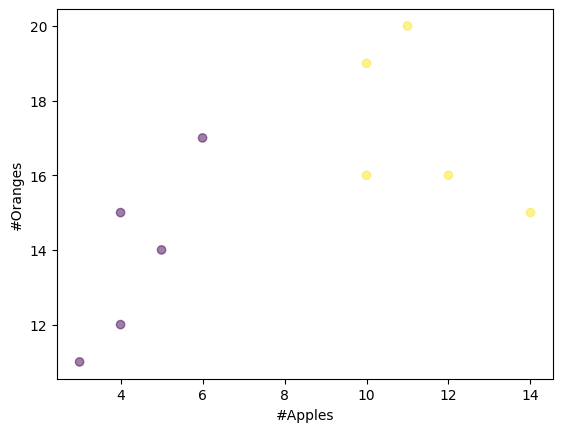

In [157]:
import matplotlib.pyplot as plt

plt.scatter(df['Apples'],df['Oranges'], c=labels,alpha=0.5)
plt.xlabel('#Apples')
plt.ylabel('#Oranges')
plt.show()

## Hierarchical Clustering : Grains data

1. อ่านข้อมูลจาก grains.csv เก็บไว้ที่ตัวแปร data

In [178]:
import pandas as pd

data = pd.read_csv('grains.csv')
data.head()

,0,1,2,3,4,5,6,variety_number,variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,Kama wheat
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,Kama wheat
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,Kama wheat
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,Kama wheat
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,Kama wheat


2. กำหนดตัวแปร X เป็น numpy array ข้อมูลจาก data ยกเว้นคอลัมน์ 'variety_number' และ 'variety'
และกำหนกตัวแปร varieties เป็นค่าข้อมูล จาก data คอลัมน์ 'variety'

In [179]:
X = data.drop(['variety_number','variety'],axis=1).values
varieties = data['variety'].values

1. สร้าง hi_linkage โดยใช้ linkage กำหนด method เป็น 'complete' และ metric เป็น 'euclidean'
2. Plot dendrogram โดยกำหนดให้ label เป็น varieties

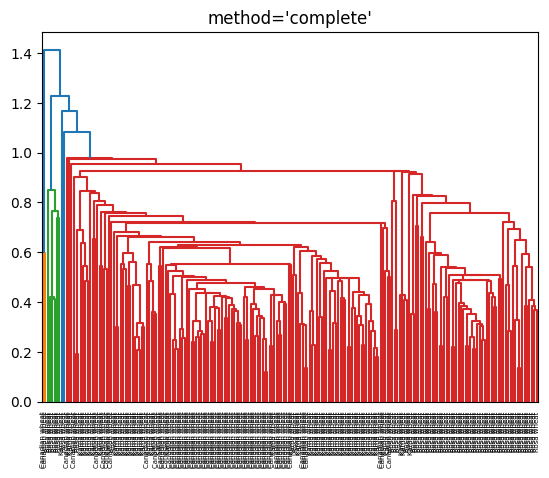

In [180]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

hi_linkage = linkage(X, method='single', metric='euclidean')

dendrogram(hi_linkage,labels=varieties)

plt.title("method='complete'")
plt.show()

3. สร้าง cluster บน hi_linkage โดยใช้ fcluster เก็บไว้ที่ตัวแปร labels กำหนดค่า t=4 และ criterion='distance'

In [182]:
from scipy.cluster.hierarchy import fcluster
labels = fcluster(hi_linkage, t=4, criterion='distance')
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


4. ทำ crosstab ระหว่าง labels และ varieties 

In [183]:
df = pd.DataFrame({'labels': labels, 'varieties':varieties })

In [184]:
ct = pd.crosstab(df['labels'], df['varieties'])
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                      70          70          70
